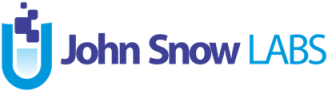

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/PerformanceTest_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest on John Snow Labs

In [1]:
!pip install transformers

In [2]:
!git clone -b bug_fix/performance_tests https://github.com/JohnSnowLabs/langtest

Cloning into 'langtest'...
remote: Enumerating objects: 33818, done.
remote: Counting objects: 100% (4461/4461), done.
remote: Compressing objects: 100% (1402/1402), done.
remote: Total 33818 (delta 3116), reused 4226 (delta 3008), pack-reused 29357
Receiving objects: 100% (33818/33818), 162.32 MiB | 23.05 MiB/s, done.
Resolving deltas: 100% (23191/23191), done.
Updating files: 100% (1909/1909), done.


In [3]:
!pip install -e ./langtest

Obtaining file:///content/langtest
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.5 MB/s eta 0:00:00
  Building editable for langtest (pyproject.toml) ... done
  Created wheel for langtest: filename=langtest-2.1.0-py3-none-any.whl size=11948 sha256=30eaf4ca34c9a56fd42a343ca93be52aff710dde9477306a2fa2ef29c9d5bd37
  Stored in directory: /tmp/pip-ephem-wheel-cache-0w9n_2mn/wheels/a2/f4/50/7b4955461b5185fc52d1be1ad40afb2ad10f2610b68e2919a0
Successfully built langtest
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.0
    Uninstalling pydantic-2.7.0:
      Successfully uninstalled pydantic-2.7.0


In [4]:
import sys

sys.path.append('/content/langtest')

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [5]:
#Import Harness from the LangTest library
from langtest import Harness

# Performance Testing

In the testing phase of evaluating Natural Language Processing (NLP) models using LangTest, a dedicated tool for assessing language-related capabilities, the focus is on measuring the time taken to process a given dataset. This metric serves as a key performance indicator, reflecting the efficiency of NLP models in real-world scenarios. The choice of an appropriate dataset is pivotal, ensuring its relevance to the application's context. By comparing the time efficiency of different models, one can identify optimal solutions for specific use cases. Additionally, if processing times are suboptimal, exploration of model architecture adjustments and optimization strategies becomes essential to enhance overall performance and responsiveness, particularly in applications demanding quick and efficient language processing.

The formula you provided,

$\ speed $ = $\frac{number\ of\ tokens\ in\ given\ dataset}{time\ taken}$

calculates the speed of processing for an NLP model. Specifically, it represents the number of words processed per unit of time, offering a quantitative measure of the model's efficiency. A higher speed value indicates faster processing, which can be crucial in real-time applications or scenarios where quick language understanding and response are essential. Monitoring and optimizing this speed metric contribute to ensuring the practical utility of NLP models, especially in applications such as chatbots, customer support systems, or any context where rapid language processing is a priority.

### Setup and Configure Harness

In [6]:
harness = Harness(task="ner", model={"model": "dslim/bert-base-NER", "hub": "huggingface"})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We have specified task as `ner` , hub as `huggingface` and model as `dslim/bert-base-NER`



For tests we used lowercase and uppercase. Other available robustness tests are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`

Bias tests:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`


Representation tests:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Accuracy tests:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Fairness tests:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`


In [7]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'lowercase': {'min_pass_rate': 0.66},
                          'uppercase': {'min_pass_rate': 0.66},
                        },
            'performance':{
                'speed': {'min_pass_rate': 100, 'unit': 'token/sec'}
            },
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}},
  'performance': {'speed': {'min_pass_rate': 100, 'unit': 'token/sec'}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

### Generating the test cases.

In [8]:
harness._testcases = None

In [9]:
harness.generate()

Generating testcases...: 100%|██████████| 2/2 [00:00<00:00, 1810.23it/s]
[W010] - Test 'lowercase': 3 samples removed out of 226
[W010] - Test 'uppercase': 28 samples removed out of 226



harness.generate() method automatically generates the test cases (based on the provided configuration)

In [10]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,lowercase,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","soccer - japan get lucky win , china in surpri..."
1,robustness,lowercase,Nadim Ladki,nadim ladki
2,robustness,lowercase,"AL-AIN , United Arab Emirates 1996-12-06","al-ain , united arab emirates 1996-12-06"
3,robustness,lowercase,Japan began the defence of their Asian Cup tit...,japan began the defence of their asian cup tit...
4,robustness,lowercase,But China saw their luck desert them in the se...,but china saw their luck desert them in the se...
...,...,...,...,...
417,robustness,uppercase,Goias 1 Gremio 3,GOIAS 1 GREMIO 3
418,robustness,uppercase,Portuguesa 1 Atletico Mineiro 0,PORTUGUESA 1 ATLETICO MINEIRO 0
419,robustness,uppercase,Robert Galvin,ROBERT GALVIN
420,robustness,uppercase,Australia gave Brian Lara another reason to be...,AUSTRALIA GAVE BRIAN LARA ANOTHER REASON TO BE...


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 422/422 [00:20<00:00, 20.96it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [12]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,lowercase,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","soccer - japan get lucky win , china in surpri...","JAPAN: MISC, LUCKY: PER, CHINA: ORG",,False
1,robustness,lowercase,Nadim Ladki,nadim ladki,Nadim Ladki: PER,,False
2,robustness,lowercase,"AL-AIN , United Arab Emirates 1996-12-06","al-ain , united arab emirates 1996-12-06","AL-AIN: LOC, United Arab Emirates: LOC",al-ain: LOC,False
3,robustness,lowercase,Japan began the defence of their Asian Cup tit...,japan began the defence of their asian cup tit...,"Japan: LOC, Asian Cup: MISC, Syria: LOC, Group...","japan: ORG, syria: ORG",False
4,robustness,lowercase,But China saw their luck desert them in the se...,but china saw their luck desert them in the se...,"China: LOC, Uzbekistan: LOC",uzbekistan: LOC,False
...,...,...,...,...,...,...,...
417,robustness,uppercase,Goias 1 Gremio 3,GOIAS 1 GREMIO 3,"Goias: ORG, Gremio: ORG","GOIAS: ORG, GREMIO: ORG",True
418,robustness,uppercase,Portuguesa 1 Atletico Mineiro 0,PORTUGUESA 1 ATLETICO MINEIRO 0,"Portuguesa: ORG, Atletico Mineiro: ORG","PORTUGUESA: ORG, ATLETICO MINEIRO: ORG",True
419,robustness,uppercase,Robert Galvin,ROBERT GALVIN,Robert Galvin: PER,"ROBERT: ORG, GALVIN: PER",False
420,robustness,uppercase,Australia gave Brian Lara another reason to be...,AUSTRALIA GAVE BRIAN LARA ANOTHER REASON TO BE...,"Australia: LOC, Brian Lara: PER, West Indies: ...","AUSTRALIA: LOC, BRIAN LARA: LOC, REASON: PER, ...",False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

To get time_elapsed for each test we pass parameter `return_runtime=True` in `.report()` method. We can also select the unit for time_elapsed i.e, seconds(s), miliseconds(ms) or microseconds(us) etc.

In [13]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,182,41,18%,66%,False
1,robustness,uppercase,152,46,23%,66%,False
2,performance,speed,0,1,100%,100%,True


# Multiple Models Runtime Testing

In [14]:
!pip install spacy johnsnowlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.9/672.9 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.8/564.8 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 499.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.

In [1]:
from langtest import Harness

In [2]:
model_dict=[{"model": "ner.dl", "hub": "johnsnowlabs"},
        {"model": "en_core_web_sm", "hub": "spacy"}]

In [3]:
# Load CoNLL
!wget https://github.com/JohnSnowLabs/langtest/raw/main/langtest/data/conll/sample.conll

--2024-04-25 14:19:32--  https://github.com/JohnSnowLabs/langtest/raw/main/langtest/data/conll/sample.conll
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll [following]
--2024-04-25 14:19:33--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50519 (49K) [text/plain]
Saving to: ‘sample.conll’

sample.conll        100%[===================>]  49.33K  --.-KB/s    in 0.04s   

2024-04-25 14:19:33 (1.27 MB/s) - ‘sample.conll’ saved [50519/50519]



In [4]:
harness = Harness(task="ner", model=model_dict, data={"data_source":"sample.conll"})

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]
Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase': {'min_pass_rate': 0.60},
            },
            'performance': {'speed': {'min_pass_rate': 100, 'unit': 'tokens/sec'}
            },
          }
 }
 )


{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}},
  'performance': {'speed': {'min_pass_rate': 100, 'unit': 'tokens/sec'}}}}

In [6]:
harness.generate().run()

Generating testcases...: 100%|██████████| 2/2 [00:00<00:00, 4236.67it/s]
[W010] - Test 'uppercase': 28 samples removed out of 226
[W010] - Test 'lowercase': 3 samples removed out of 226

Generating testcases...: 100%|██████████| 2/2 [00:00<00:00, 17050.02it/s]
[W010] - Test 'uppercase': 28 samples removed out of 226
[W010] - Test 'lowercase': 3 samples removed out of 226

Running testcases... : 100%|██████████| 422/422 [00:02<00:00, 153.07it/s]


In [7]:
harness.report()

test_type,lowercase,speed,uppercase
model_name,,,
en_core_web_sm,0.460000,1.000000,0.220000
ner.dl,0.100000,0.000000,0.830000
